<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [97]:
# Something new to install...
#! pip install plotly

In [122]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [123]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [124]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [125]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [126]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [127]:

# Filter Data to Most Recent Year
df_latest = df[df['year'] == df['year'].max()].copy()
df_latest

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.82800,31889923,974.58034,AFG,4
23,Albania,Europe,2007,76.42300,3600523,5937.02953,ALB,8
35,Algeria,Africa,2007,72.30100,33333216,6223.36747,DZA,12
47,Angola,Africa,2007,42.73100,12420476,4797.23127,AGO,24
59,Argentina,Americas,2007,75.32000,40301927,12779.37964,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.24900,85262356,2441.57640,VNM,704
1667,West Bank and Gaza,Asia,2007,73.42200,4018332,3025.34980,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.69800,22211743,2280.76991,YEM,887
1691,Zambia,Africa,2007,42.38400,11746035,1271.21159,ZMB,894


In [128]:
# Set Country to Index
# setting Country name as index column
df_latest.set_index("country", inplace = True)



In [129]:
# Drop `iso_alpha`, `year`, and `iso_num`
df_latest.drop('iso_alpha', axis=1, inplace=True) 
df_latest.drop('year', axis=1, inplace=True) 
df_latest.drop('iso_num', axis=1, inplace=True) 

In [130]:
df_latest.head()

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.82800,31889923,974.58034
Albania,Europe,76.42300,3600523,5937.02953
Algeria,Africa,72.30100,33333216,6223.36747
Angola,Africa,42.73100,12420476,4797.23127
Argentina,Americas,75.32000,40301927,12779.37964


In [131]:
# How many countries in each continent?
df_latest['continent'].value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

In [132]:
# Get dummies!
df_latest = pd.get_dummies(df_latest, columns=['continent'])

In [133]:
# Head (again!)
df_latest.head()

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,0,1,0,0
Albania,76.42300,3600523,5937.02953,0,0,0,1,0
Algeria,72.30100,33333216,6223.36747,1,0,0,0,0
Angola,42.73100,12420476,4797.23127,1,0,0,0,0
Argentina,75.32000,40301927,12779.37964,0,1,0,0,0


In [134]:
df_latest.columns

Index(['lifeExp', 'pop', 'gdpPercap', 'continent_Africa', 'continent_Americas',
       'continent_Asia', 'continent_Europe', 'continent_Oceania'],
      dtype='object')

In [135]:
# Define X
# X = df[['x1', 'x2']]
X = df_latest.copy()

In [136]:
# Scale Features

sc = StandardScaler()
X_scaled = sc.fit_transform(X)


### II. K-Means Clustering Model

In [137]:
# Elbow Plot

inertia_list = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[1136.0,
 803.7487873233015,
 605.9844595636508,
 411.73669924060437,
 265.0727010035231,
 145.1814036102372,
 107.71312813400928,
 85.04751469619286,
 64.21503964722274,
 51.11763019162191,
 44.45191011780964,
 39.753081133234396,
 35.09366372663472,
 32.501488858700284,
 29.993013396750293,
 27.413209135832886,
 25.163880395621717,
 23.02837560889885,
 20.86107235980446,
 18.64900972565179]

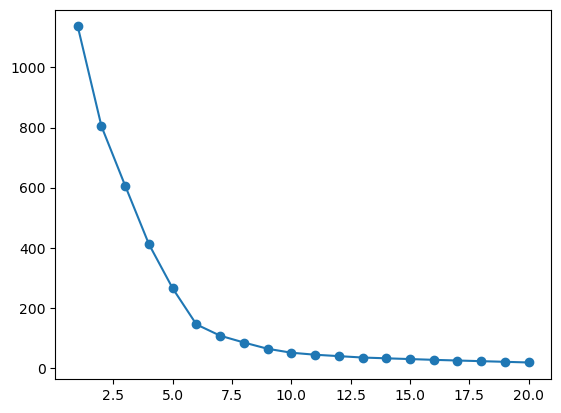

In [145]:
plt.plot(range(1,21), inertia_list, marker='o');

In [138]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
silhouette_list

[0.3720043291366166,
 0.489873296239894,
 0.6190518825966604,
 0.6533518645117283,
 0.6841362868735931,
 0.6788030429382467,
 0.6176983255576001,
 0.611564034924892,
 0.611036290859275,
 0.5776177626869833,
 0.5327955770615701,
 0.5346330830663085,
 0.5594897758689857,
 0.49117122771657584,
 0.48281467787416665,
 0.4796965017076556,
 0.46389145266357057,
 0.4489219100014604,
 0.46338092323145896]

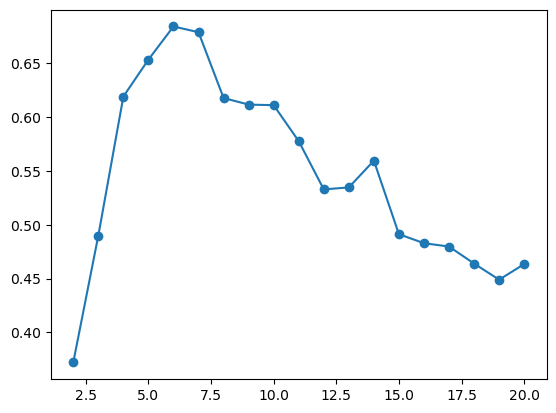

In [148]:
plt.plot(range(2,21), silhouette_list, marker='o');

#### Based off of our metrics above, which k should we try first?

Answer Here:



In [149]:
# Now let's try it!

# Instantiate & Fit

#Instantiate and fit (train) a K-means clustering model

km = KMeans(n_clusters=6, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [150]:
# Silhouette Score
silhouette_score(X_scaled, km.labels_)

0.6841362868735931

#### Visualize Your Clusters!

In [151]:
df_latest['cluster'] = km.labels_
df_latest.head()

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,0,1,0,0,3
Albania,76.42300,3600523,5937.02953,0,0,0,1,0,0
Algeria,72.30100,33333216,6223.36747,1,0,0,0,0,1
Angola,42.73100,12420476,4797.23127,1,0,0,0,0,1
Argentina,75.32000,40301927,12779.37964,0,1,0,0,0,2


In [152]:
df_latest

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,0,1,0,0,3
Albania,76.42300,3600523,5937.02953,0,0,0,1,0,0
Algeria,72.30100,33333216,6223.36747,1,0,0,0,0,1
Angola,42.73100,12420476,4797.23127,1,0,0,0,0,1
Argentina,75.32000,40301927,12779.37964,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
Vietnam,74.24900,85262356,2441.57640,0,0,1,0,0,3
West Bank and Gaza,73.42200,4018332,3025.34980,0,0,1,0,0,3
"Yemen, Rep.",62.69800,22211743,2280.76991,0,0,1,0,0,3


/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda

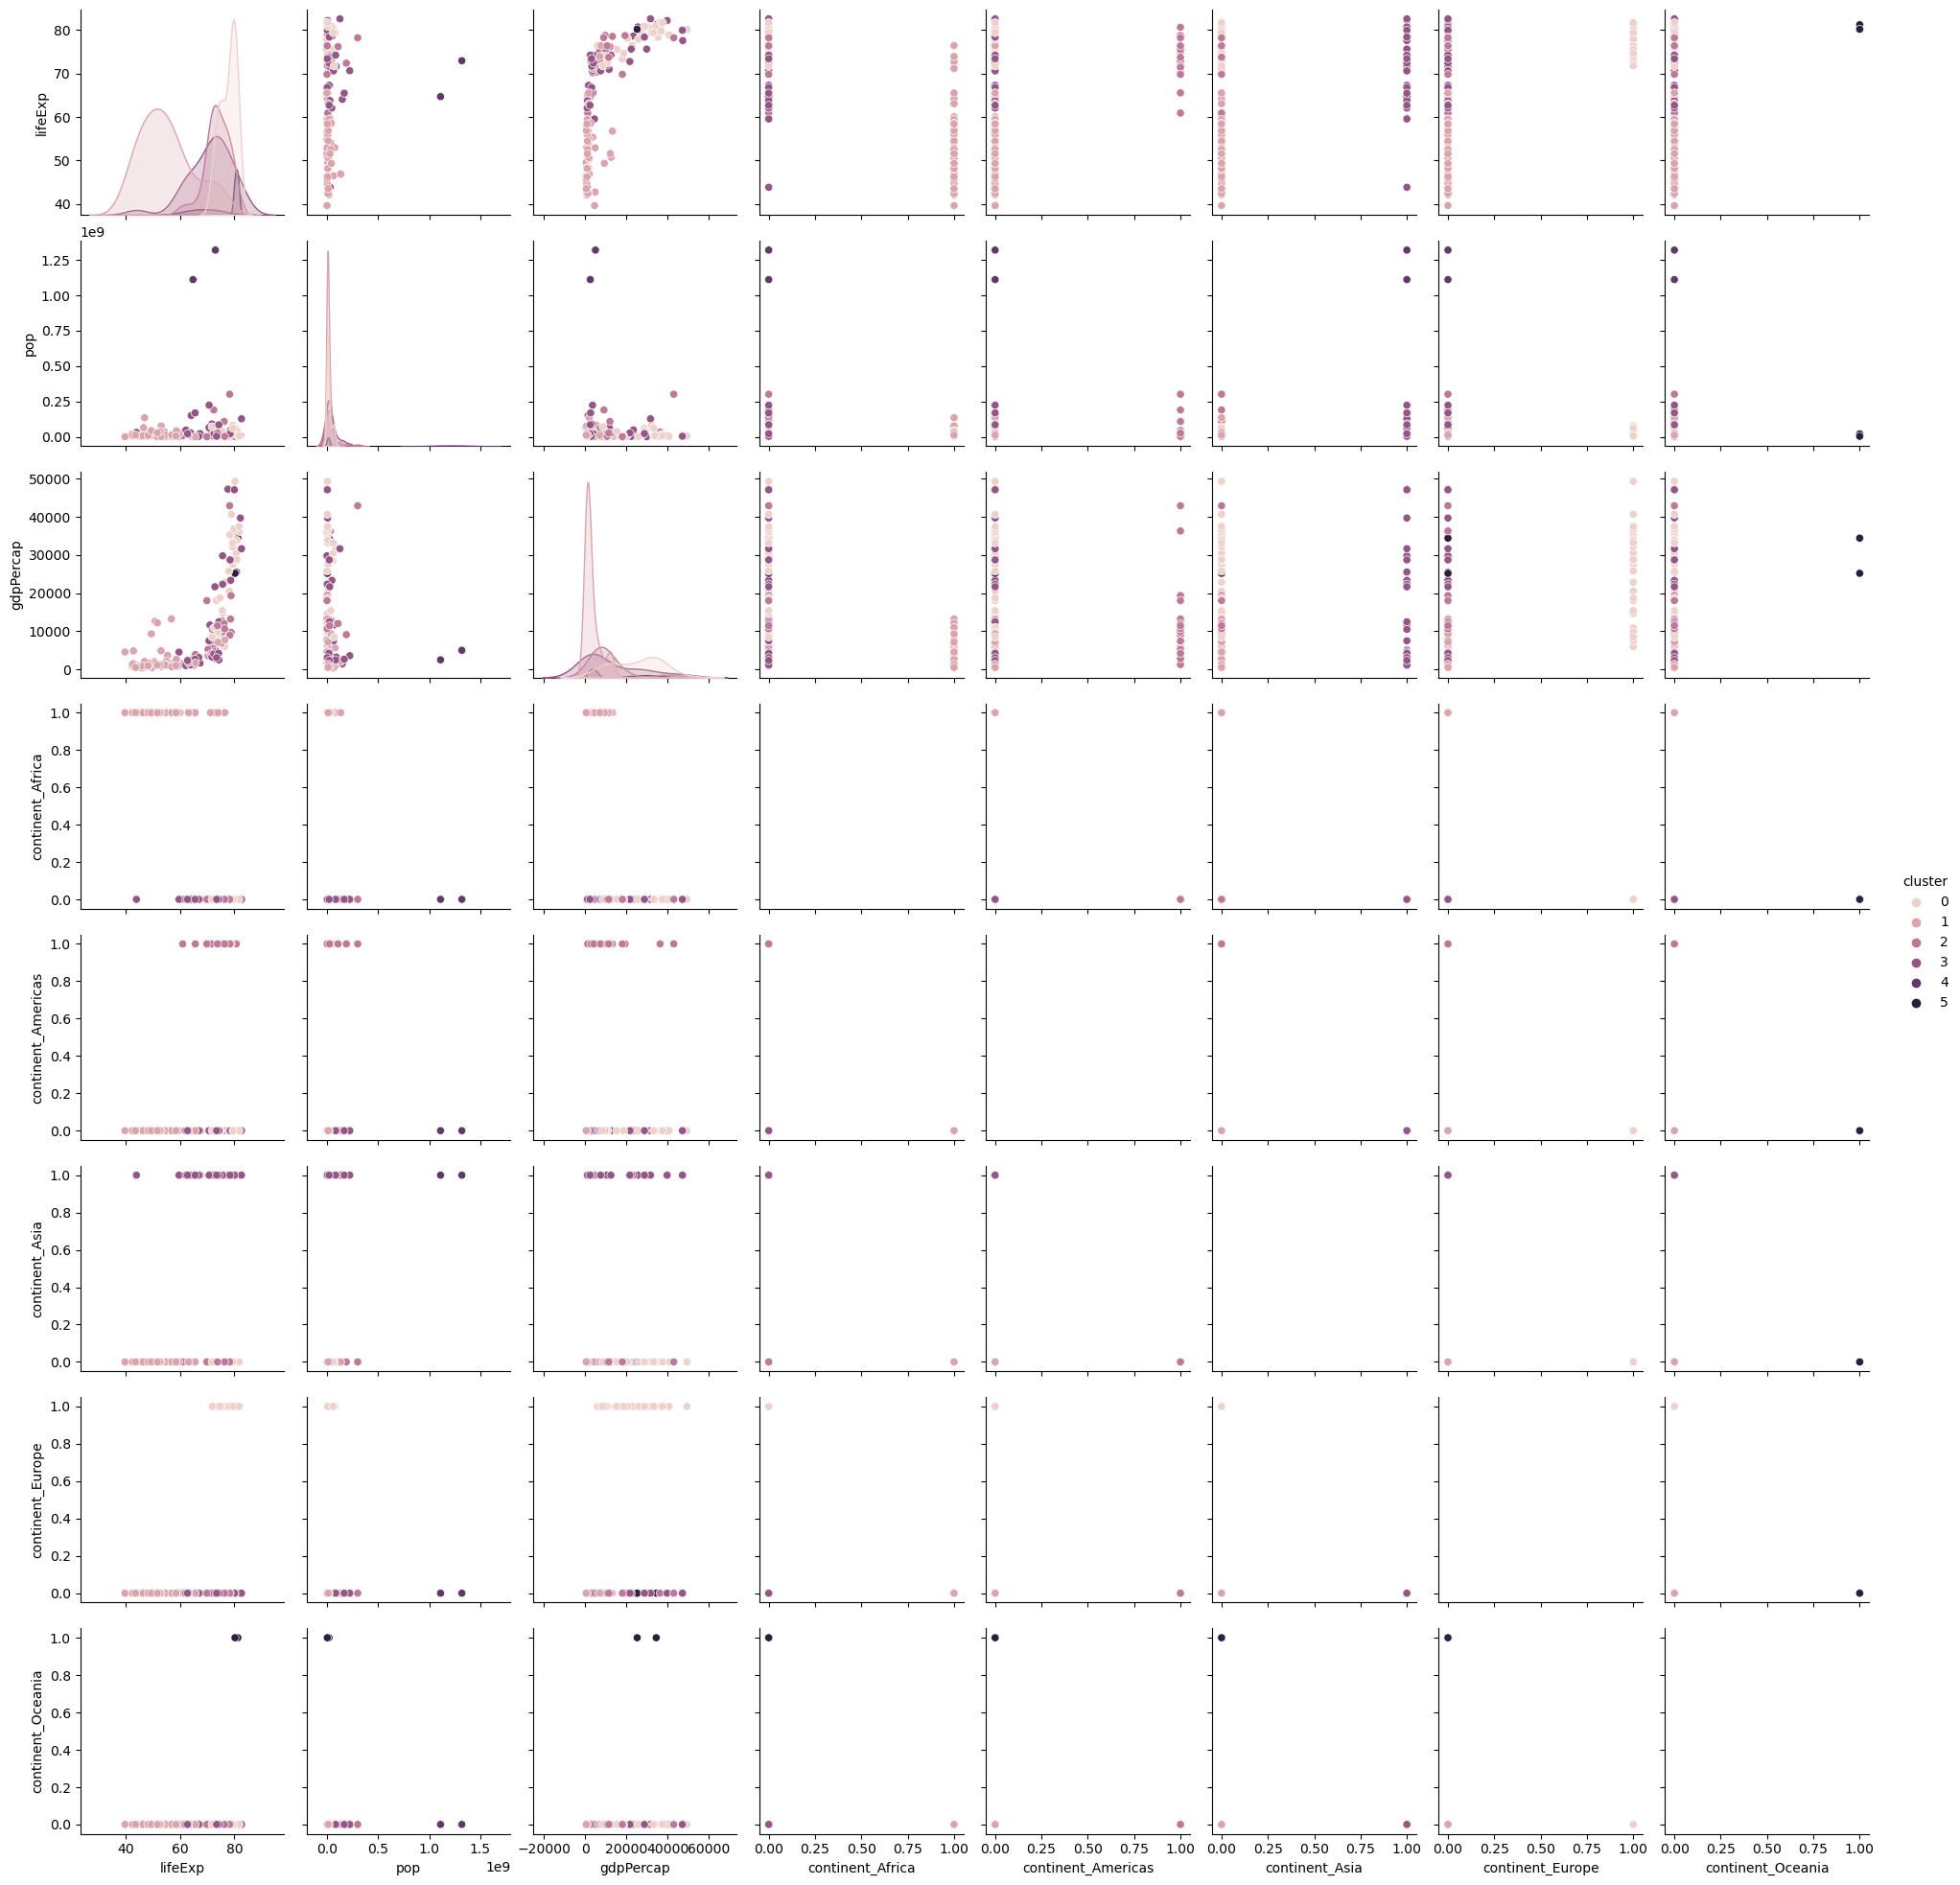

In [153]:
# Method 1: Pairplots/Scatterplots

# Pairplot

sns.pairplot(df_latest, hue='cluster');

In [157]:
# Method 2: Groupby

df_latest.groupby(['cluster']).mean()

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
cluster,,,,,,,,
0,77.64860,19536617.63333,25054.48164,0.00000,0.00000,0.00000,1.00000,0.00000
1,54.80604,17875763.30769,3089.03260,1.00000,0.00000,0.00000,0.00000,0.00000
2,73.60812,35954847.36000,11003.03163,0.00000,1.00000,0.00000,0.00000,0.00000
3,70.85100,44608851.61290,13038.66327,0.00000,0.00000,1.00000,0.00000,0.00000
4,68.82950,1214539713.50000,3705.66263,0.00000,0.00000,1.00000,0.00000,0.00000
5,80.71950,12274973.50000,29810.18827,0.00000,0.00000,0.00000,0.00000,1.00000


#### An Even Closer Look...Which countries are in each of these clusters?

In [164]:
df_latest[df_latest['cluster']==0].index

Index(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom'],
      dtype='object', name='country')

In [165]:
# For loop

country = []
for i in range(6):
    country.append(list(df_latest[df_latest['cluster']==0].index))
    print(f'cluster{i}: {country[i]}')

cluster0: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
cluster1: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
cluster2: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'No

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [179]:
### Find "optimal" epsilon

epsilon_list = [0.2, 0.5, 1, 1.5, 2.0, 2.3, 2.5, 2.8, 3.0, 3.25, 3.5, 4.0]
score_list = []

for epi in epsilon_list:
    dbscan = DBSCAN(eps=epi)
    dbscan.fit(X_scaled)
    
    score_list.append(silhouette_score(X_scaled, dbscan.labels_))

score_list

[0.037508947718686805,
 0.4558581018853339,
 0.6488127263912179,
 0.657927523447763,
 0.6596891219065235,
 0.6596891219065235,
 0.6596891219065235,
 0.6596891219065235,
 0.6596891219065235,
 0.31739623847543474,
 0.6209321792351485,
 0.6209321792351485]

In [180]:
# Silhouette scores at various epsilons
results = pd.DataFrame(data=score_list, 
                       columns=['Silhouette Score'],
                       index = epsilon_list)
results

,Silhouette Score
0.20000,0.03751
0.50000,0.45586
1.00000,0.64881
1.50000,0.65793
2.00000,0.65969
2.30000,0.65969
2.50000,0.65969
2.80000,0.65969
3.00000,0.65969
3.25000,0.31740


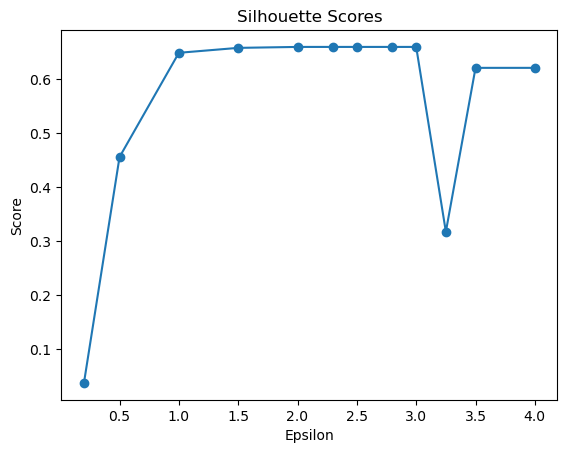

In [181]:
plt.plot(epsilon_list, score_list, marker='o')
plt.xlabel("Epsilon")
plt.ylabel("Score")
plt.title("Silhouette Scores");


**Which countries are in each cluster?**
>Epsilon1

In [184]:
dbscan = DBSCAN()
dbscan.fit(X_scaled)
df_latest['cluster']= dbscan.labels_

In [185]:
df_latest['cluster'].value_counts()

 2    41
 0    29
-1    28
 3    20
 4    17
 1     7
Name: cluster, dtype: int64

/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/pornpanthongdee/opt/anaconda

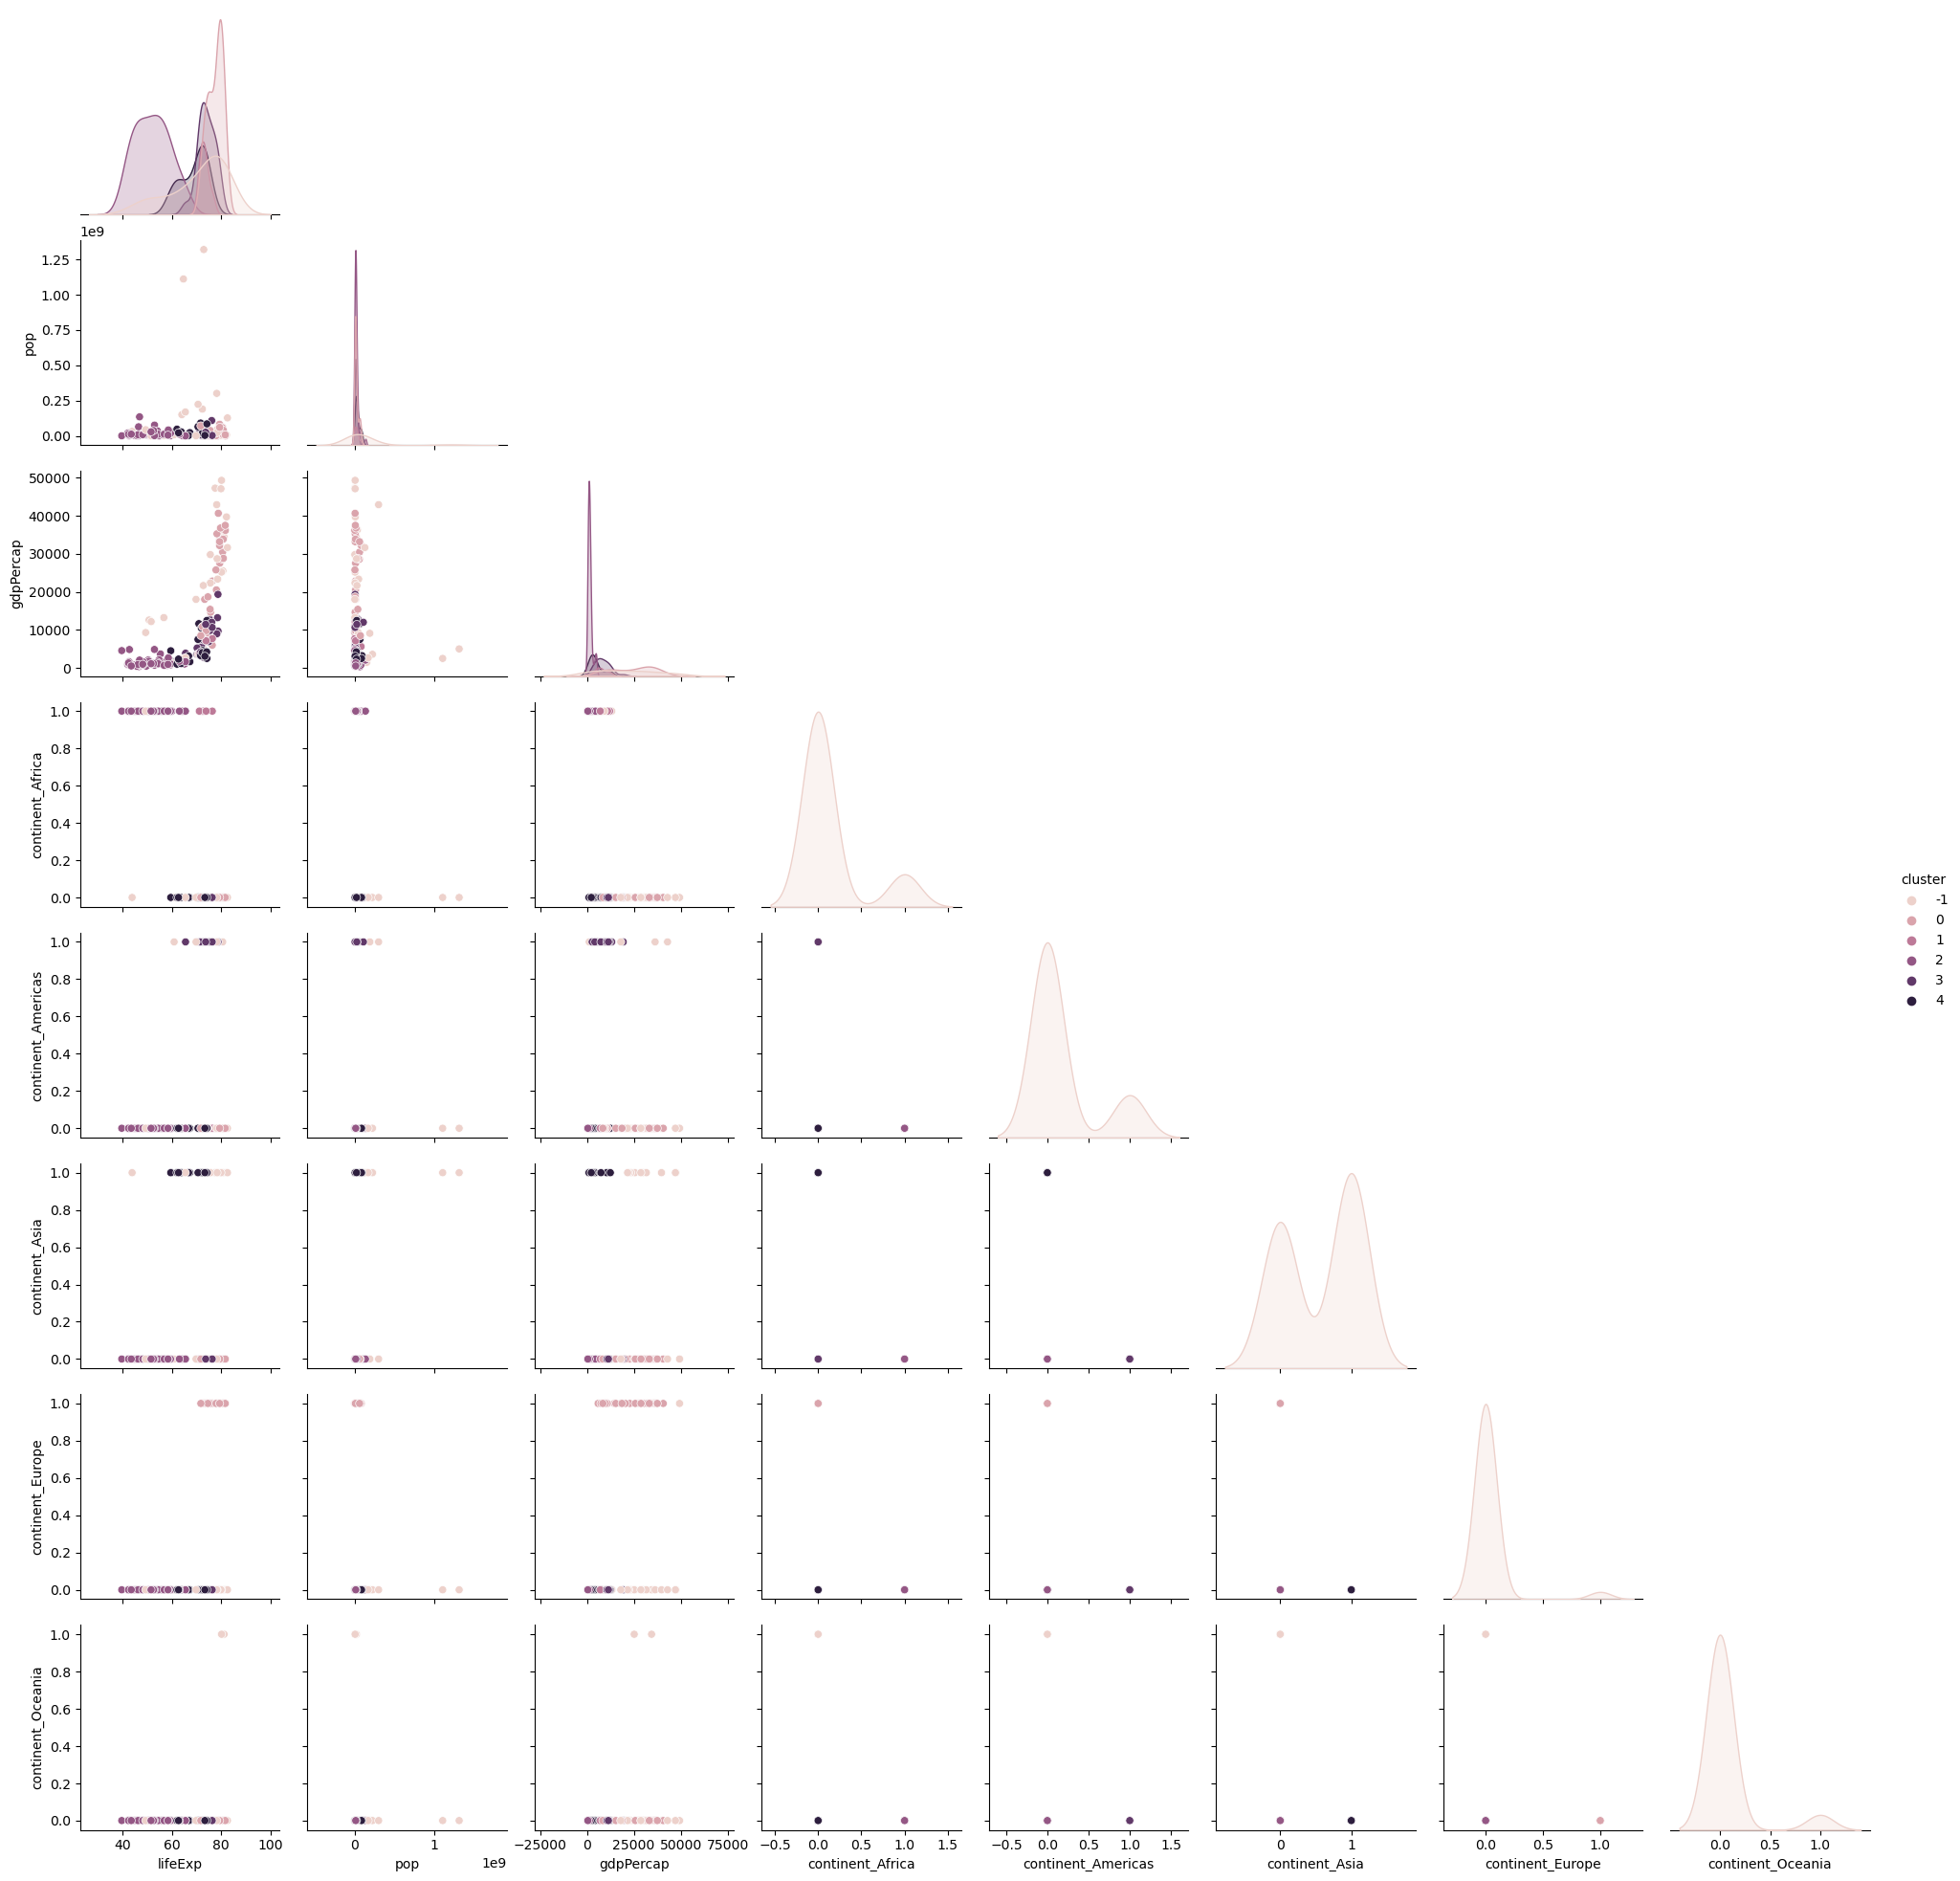

In [187]:
sns.pairplot(df_latest,corner=True, hue='cluster');

In [188]:
df_latest.columns

Index(['lifeExp', 'pop', 'gdpPercap', 'continent_Africa', 'continent_Americas',
       'continent_Asia', 'continent_Europe', 'continent_Oceania', 'cluster'],
      dtype='object')

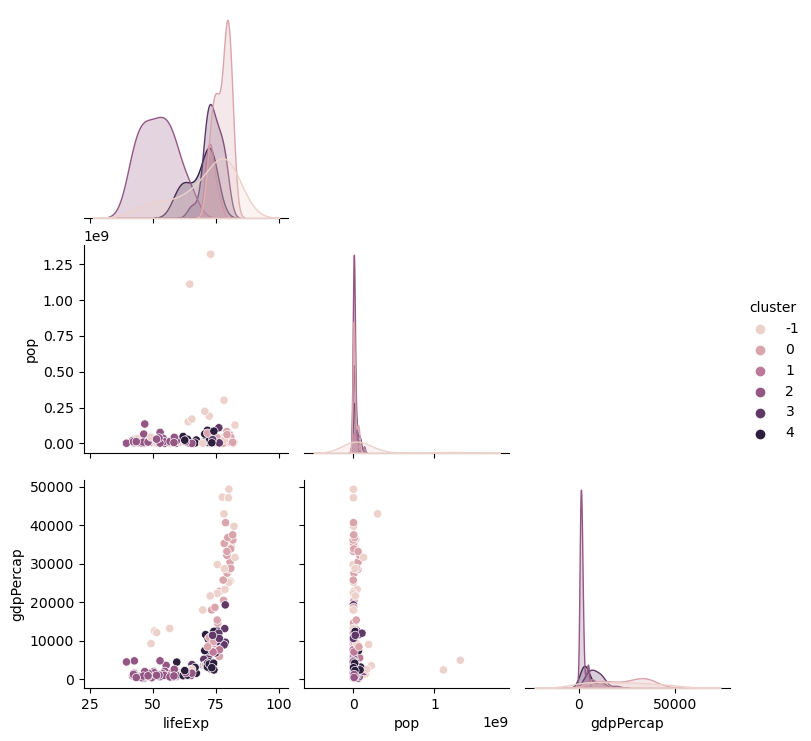

In [190]:
sns.pairplot(df_latest[['lifeExp', 'pop', 'gdpPercap','cluster']],corner=True, hue='cluster');

In [191]:
country = []
for i in range(6):
    country.append(list(df_latest[df_latest['cluster']==0].index))
    print(f'cluster{i}: {country[i]}')

cluster0: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
cluster1: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
cluster2: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Poland', 'Portugal', '

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 